<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [96]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [97]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [98]:
# Examine column names
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('\nThe column names are:\n')
    print(df.columns.tolist())

    # Display data types
    print('\nThe data types are:\n')
    print(df.dtypes)
    
    # Examine shape
    print('\nThe shape is:\n')
    print(df.shape)

    # Examine summary information
    print('\nThe summary statistics are:\n')
    print(df.describe())


The column names are:

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeSt

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [99]:
# Check for missing values in the dataset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Missing values per column:\n")
    print(df.isnull().sum())

#
# Clean up missing values in the RemoteWork, YearsCodePro, JobSat and ConvertedCompYearly columns
#

# Calculate the mode of the RemoteWork column and replace nulls
majority_remote = df['RemoteWork'].mode()[0]
df.fillna({'RemoteWork':majority_remote}, inplace = True)

# Convert YearsCodePro from object to numeric, force errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Calculate the mean of the YearsCodePro column and replace nulls
mean_code = df['YearsCodePro'].mean()
df.fillna({'YearsCodePro':mean_code}, inplace = True)

# Replace nulls in 'JobSat' with mean values
mean_sat = df['JobSat'].mean()
df.fillna({'JobSat':mean_sat}, inplace = True)

# Handle missing language values
df.fillna({'LanguageHaveWorkedWith':''}, inplace=True)
df.fillna({'LanguageWantToWorkWith':''}, inplace=True)


Missing values per column:

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmi

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [100]:
# Analyze key columns

# Value counts for 'Employment'
print("\nValue counts for Employment\n")
print(df['Employment'].value_counts())

# Value counts for 'JobSat'
print("\nValue counts for JobSat:\n")
print(df['JobSat'].value_counts())

# Value counts for 'YearsCodePro'
print("\nValue counts for YearsCodePro:\n")
print(df['YearsCodePro'].value_counts())


Value counts for Employment

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looki

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


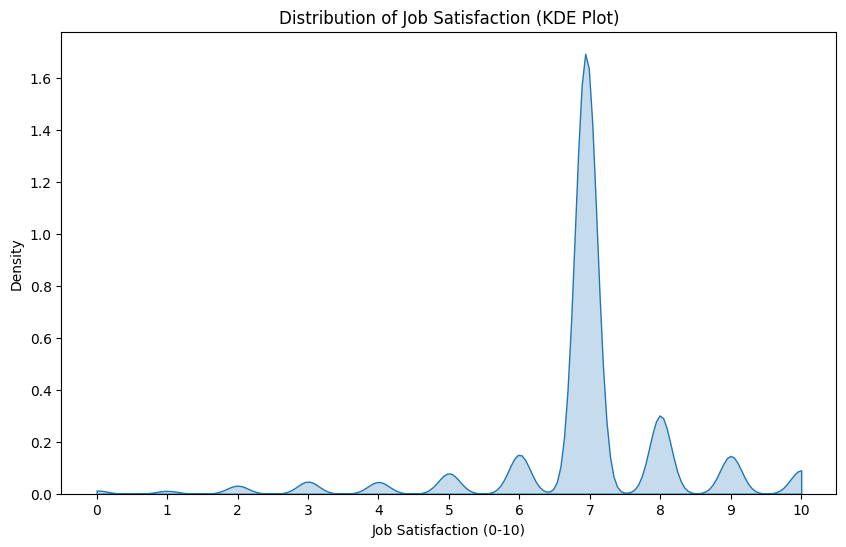

In [101]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], fill=True, clip=(0,10))
plt.title('Distribution of Job Satisfaction (KDE Plot)')
plt.xlabel('Job Satisfaction (0-10)')
plt.ylabel('Density')
plt.xticks(range(0, 11))
plt.show()


### Analysis of the Job Satisfaction distribution
Over 50% of developers rate their job satisfaction at 7/10 and the overall distribution shows
a skewness towards satisfaction ratings above 5/10.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


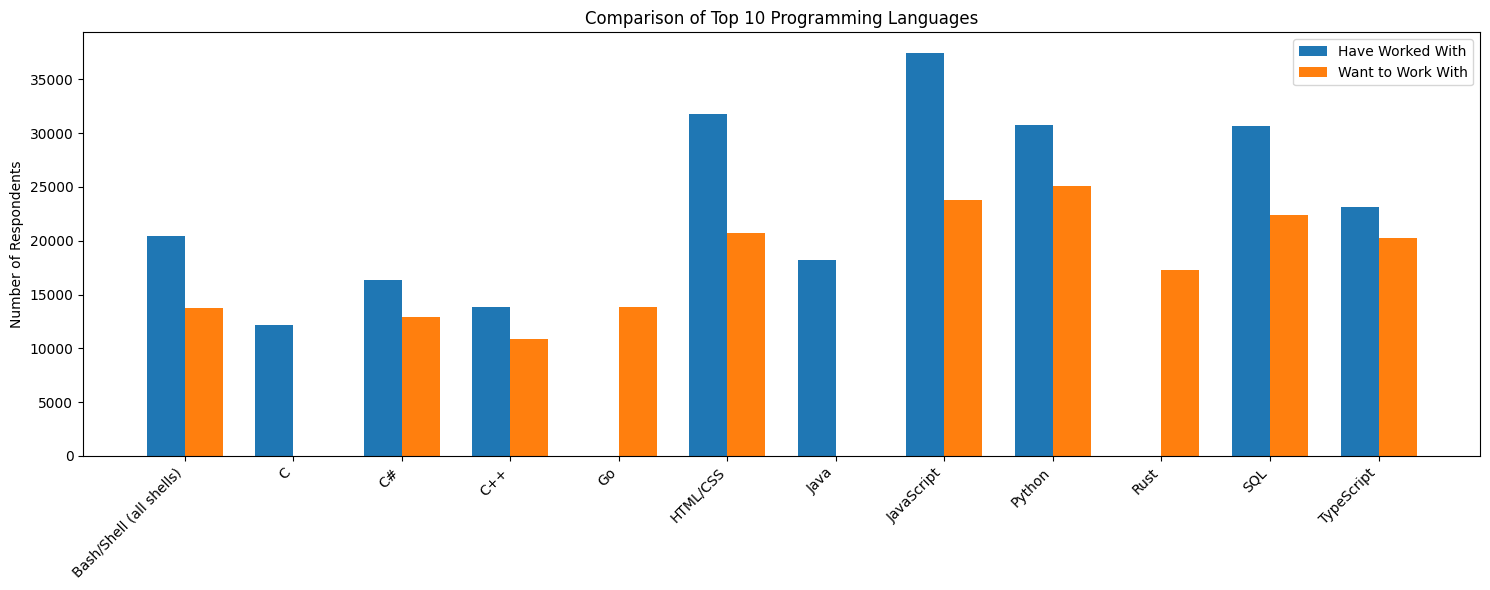

In [102]:
have_worked = [lang.strip() for langs in df['LanguageHaveWorkedWith'].str.split(';') for lang in langs if lang.strip()]
want_to_work = [lang.strip() for langs in df['LanguageWantToWorkWith'].str.split(';') for lang in langs if lang.strip()]

# Count language occurrences
have_worked_counts = Counter(have_worked)
want_to_work_counts = Counter(want_to_work)

# Get top 10 languages for each
top_n = 10
top_have_worked = dict(have_worked_counts.most_common(top_n))
top_want_to_work = dict(want_to_work_counts.most_common(top_n))

# Grouped Bar Chart (for count comparison)
languages = sorted(set(top_have_worked) | set(top_want_to_work))
have_counts = [top_have_worked.get(lang, 0) for lang in languages]
want_counts = [top_want_to_work.get(lang, 0) for lang in languages]

x = range(len(languages))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar([i - width/2 for i in x], have_counts, width, label='Have Worked With')
rects2 = ax.bar([i + width/2 for i in x], want_counts, width, label='Want to Work With')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Respondents')
ax.set_title(f'Comparison of Top {top_n} Programming Languages')
ax.set_xticks(x)
ax.set_xticklabels(languages, rotation=45, ha='right')
ax.legend()
fig.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


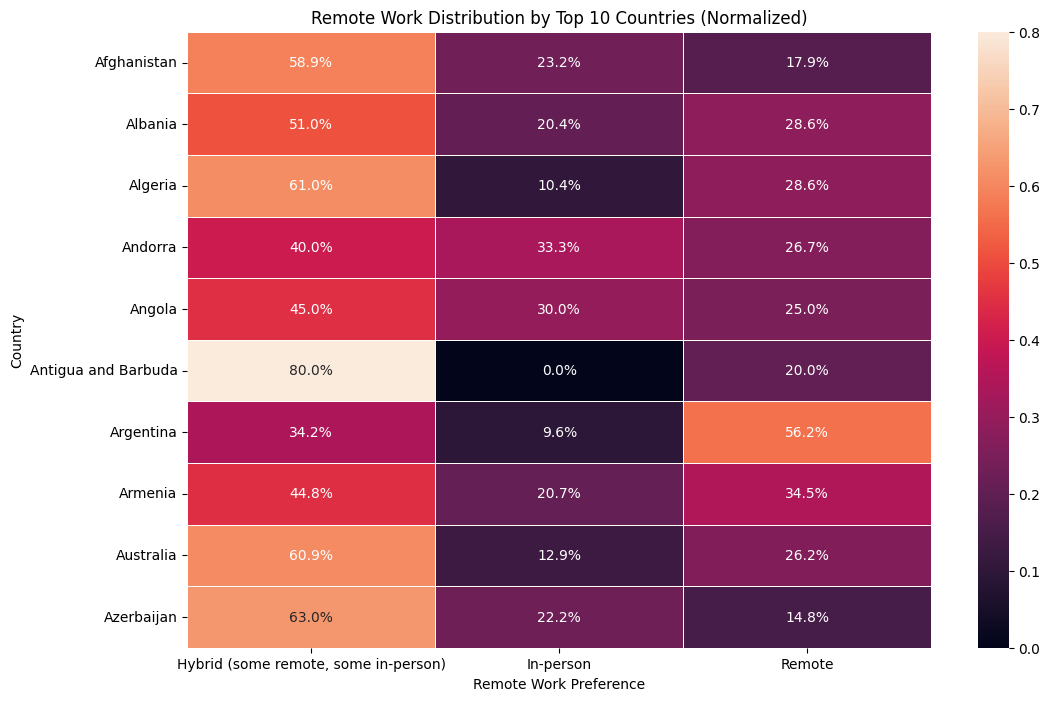

In [103]:
# Clean up country names, using a dictionary for replacements
replacements = {
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United States of America': 'USA',
    'Republic of Korea': 'South Korea',
    'Iran, Islamic Republic of...': 'Iran',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Congo, Republic of the...': 'Republic of Congo',
    'Micronesia, Federated States of...': 'Micronesia'
}

# Replacing values using the dictionary
df['Country'] = df['Country'].replace(replacements)

#Create a crosstab between Country and RemoteWork
remote_work_by_country = pd.crosstab(df['Country'], df['RemoteWork'])

# Normalize the cross-tabulation to show percentages within each Country
remote_work_by_country_normalized = remote_work_by_country.div(remote_work_by_country.sum(axis=1), axis=0)

# Select top N countries for visualization
top_n = 10
top_countries = remote_work_by_country_normalized.sum(axis=1).nlargest(top_n).index
remote_work_by_country_normalized_top = remote_work_by_country_normalized.loc[top_countries]

# Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(remote_work_by_country_normalized_top, annot=True, fmt=".1%", linewidths=.5)
plt.title(f'Remote Work Distribution by Top {top_n} Countries (Normalized)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Country')
plt.yticks(rotation=0)
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [104]:
# Calculate the Pearson correlation coefficient
correlation_pearson = df['JobSat'].corr(df['YearsCodePro'], method='pearson')
print(f"Pearson correlation coefficient: {correlation_pearson}")

Pearson correlation coefficient: 0.07052408099423457


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Cleaned list of Education:

['Primary/elementary school' 'Bachelors' 'Masters' 'Some college'
 'Secondary school' 'Doctorate' 'Associates' 'Something else' nan]


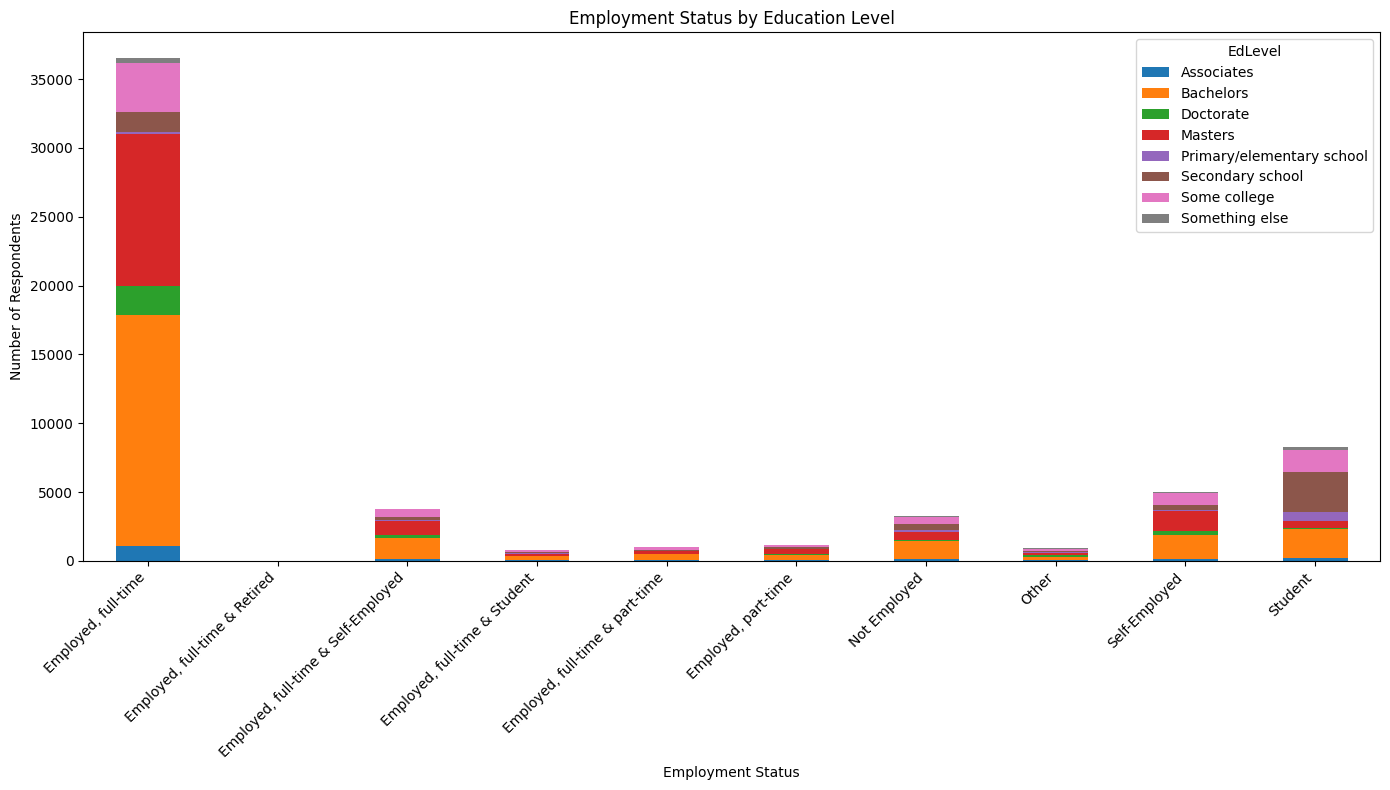

In [105]:
# Create a dictionary of mappings for education level
edlevel_mapping = {
    'Bachelor’s degree': 'Bachelors',
    'Master’s degree': 'Masters',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelors',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Masters',
    'Some college/university study without earning a degree': 'Some college',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Associate degree (A.A., A.S., etc.)': 'Associates',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate'
}

# Replacing values using the dictionary
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

print('Cleaned list of Education:\n')
print(df['EdLevel'].unique())

# Simplify Employment categories
def simplify_employment(employment):
    if "Employed, full-time" in employment:
        if "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
            return "Employed, full-time & Self-Employed"
        elif "part-time" in employment:
          return "Employed, full-time & part-time"
        elif "Student" in employment:
          return "Employed, full-time & Student"
        elif "Retired" in employment:
          return "Employed, full-time & Retired"
        else:
            return "Employed, full-time"
    elif "Student" in employment:
        return "Student"
    elif "Not employed" in employment:
        return "Not Employed"
    elif "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
        return "Self-Employed"
    elif "Employed, part-time" in employment:
        return "Employed, part-time"
    else:
        return "Other"  # Catch-all for less frequent combinations

df['Employment'] = df['Employment'].apply(simplify_employment)

# Create the cross-tabulation
employment_edlevel_crosstab = pd.crosstab(df['Employment'], df['EdLevel'])

# Create the stacked bar plot
employment_edlevel_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [106]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_survey_data_lab11.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
